In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
HPI_low_tier = pd.read_csv("datasets/Metro_zhvi_uc_sfrcondo_tier_0.0_0.33_sm_sa_mon.csv")
HPI_low_tier.insert(3,"Region",[row.split(",")[0] for row in HPI_low_tier['RegionName']])

HPI_medium_tier = pd.read_csv("datasets/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
HPI_medium_tier.insert(3,"Region",[row.split(",")[0] for row in HPI_medium_tier['RegionName']])

HPI_high_tier = pd.read_csv("datasets/Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_mon.csv")
HPI_high_tier.insert(3,"Region",[row.split(",")[0] for row in HPI_high_tier['RegionName']])


In [3]:
rows = [list(HPI_low_tier.columns)]
for Region_id in HPI_low_tier['RegionID']:
    low = HPI_low_tier[HPI_low_tier['RegionID']==Region_id]
    medium = HPI_medium_tier[HPI_medium_tier['RegionID']==Region_id]
    high = HPI_high_tier[HPI_high_tier['RegionID']==Region_id]
    row = []
    for val in low.columns[:6]:
        row.append(low[val].item())
    for col in low.columns[6:]:
        mean = np.mean([low[col],medium[col],high[col]])
        row.append(mean)   
    rows.append(row)     
    
mean_hpi = pd.DataFrame(rows)
new_header = mean_hpi.iloc[0] 
mean_hpi = mean_hpi[1:] 
mean_hpi.columns = new_header     

mean_hpi.to_csv("Metro_zhvi_uc_sfrcondo_tier_mean_sm_sa_mon.csv")


In [4]:
mean_hpi.head()

,RegionID,SizeRank,RegionName,Region,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
1,102001,0,United States,United States,Country,NaN,121728,121729,121761,121849,...,293373,294731,296446,298713,301372,304292,307435,310676,313920,317364
2,394913,1,"New York, NY",New York,Msa,NY,212205,211716,211399,210793,...,537598,539415,541809,545245,549658,554580,559732,564688,569411,574278
3,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles-Long Beach-Anaheim,Msa,CA,212838,213166,213194,213343,...,800265,801604,806816,815207,824032,831539,839029,846637,853765,860912
4,394463,3,"Chicago, IL",Chicago,Msa,IL,181712,181383,180942,180427,...,268341,268946,270111,271711,273892,276292,278660,281005,283075,285741
5,394514,4,"Dallas-Fort Worth, TX",Dallas-Fort Worth,Msa,TX,127919,127963,128138,128474,...,284452,285921,287640,289591,291596,294314,297118,300352,302869,306231


### plot

In [5]:
def plot_hpi(data):
    df = data.loc[data['Region'].isin(['Stamford','Dallas-Fort Worth','Las Vegas'])]
    df = df[df['StateName']!='NM']
    df = df.drop(columns=['RegionID', 'SizeRank','RegionName','RegionType','StateName'])
    df.set_index("Region", inplace = True)
    df = df.T
    df.index = pd.to_datetime(df.index)
    return df

In [6]:
mean_msas = plot_hpi(mean_hpi)

In [7]:
high_msas = plot_hpi(HPI_high_tier)

In [8]:
medium_msas = plot_hpi(HPI_medium_tier)

In [9]:
low_msas = plot_hpi(HPI_low_tier)

### plot BP HPI

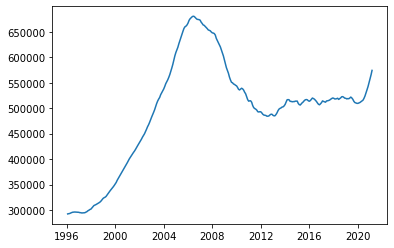

In [10]:
plt.plot(mean_msas.index,mean_msas['Stamford'])

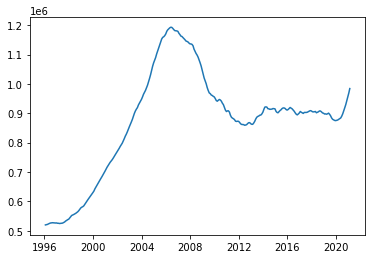

In [11]:
plt.plot(high_msas.index,high_msas['Stamford'])

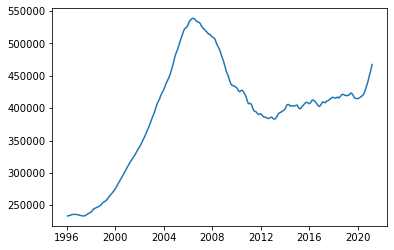

In [12]:
plt.plot(medium_msas.index,medium_msas['Stamford'])

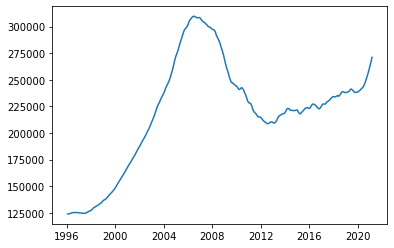

In [13]:
plt.plot(low_msas.index,low_msas['Stamford'])

### plot Dallas HPI

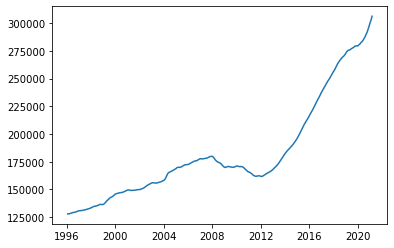

In [14]:
plt.plot(mean_msas.index,mean_msas['Dallas-Fort Worth'])

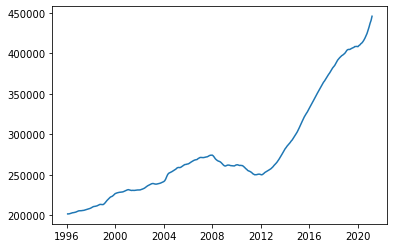

In [15]:
plt.plot(high_msas.index,high_msas['Dallas-Fort Worth'])

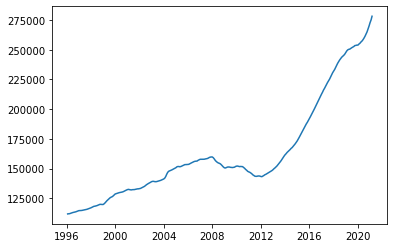

In [16]:
plt.plot(medium_msas.index,medium_msas['Dallas-Fort Worth'])

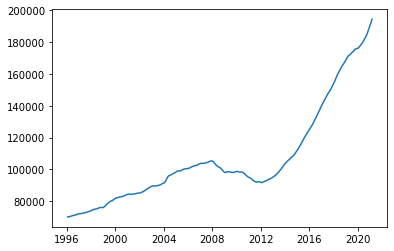

In [17]:
plt.plot(low_msas.index,low_msas['Dallas-Fort Worth'])

### plot LV HPI

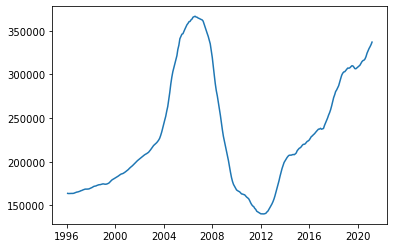

In [18]:
plt.plot(mean_msas.index,mean_msas['Las Vegas'])

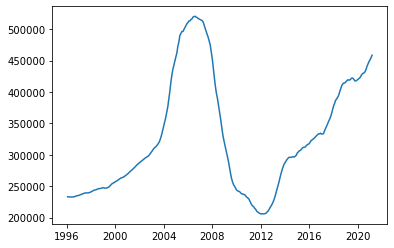

In [19]:
plt.plot(high_msas.index,high_msas['Las Vegas'])

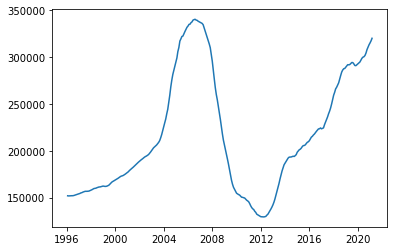

In [20]:
plt.plot(medium_msas.index,medium_msas['Las Vegas'])

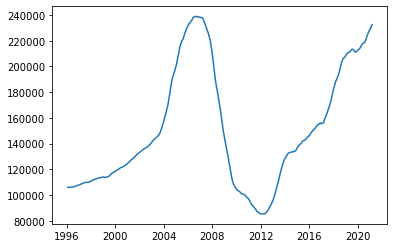

In [21]:
plt.plot(low_msas.index,low_msas['Las Vegas'])

## convert datasets to tables pattern

In [22]:
def change_rows(data,name):
    data = data.drop(columns=['RegionID', 'SizeRank','RegionName','RegionType'])
    data = data.rename(columns={'Region': 'MSA', "StateName":"State"})

    vals = [["DATE","HPI","MSA","State"]]
    for row in data.index[1:]:
        for col in data.columns[2:]:
            vals.append([col,data[col][row],data["MSA"][row],data["State"][row]])
    
    hpi = pd.DataFrame(vals)
    new_header = hpi.iloc[0] 
    hpi = hpi[1:] 
    hpi.columns = new_header
    
    hpi = hpi.reset_index()
    hpi = hpi.drop(columns=['index'])
    
    hpi['1_Month_change'] = hpi['HPI'].pct_change()
    hpi['1_Year_change'] = hpi['HPI'].pct_change(periods=12)

    hpi.to_csv(f"{name}_data.csv")
    
    return hpi

In [23]:
change_rows(HPI_high_tier,"HPI_high_tier")

,DATE,HPI,MSA,State,1_Month_change,1_Year_change
0,1996-01-31,335031,New York,NY,NaN,NaN
1,1996-02-29,334239,New York,NY,-0.002364,NaN
2,1996-03-31,333721,New York,NY,-0.001550,NaN
3,1996-04-30,332721,New York,NY,-0.002997,NaN
4,1996-05-31,332062,New York,NY,-0.001981,NaN
...,...,...,...,...,...,...
275117,2020-10-31,453925,Ketchikan,AK,0.003162,0.012362
275118,2020-11-30,456139,Ketchikan,AK,0.004877,0.016328
275119,2020-12-31,458631,Ketchikan,AK,0.005463,0.022039
275120,2021-01-31,461221,Ketchikan,AK,0.005647,0.028357


In [24]:
change_rows(HPI_medium_tier,"HPI_medium_tier")

,DATE,HPI,MSA,State,1_Month_change,1_Year_change
0,1996-01-31,187450,New York,NY,NaN,NaN
1,1996-02-29,187013,New York,NY,-0.002331,NaN
2,1996-03-31,186734,New York,NY,-0.001492,NaN
3,1996-04-30,186202,New York,NY,-0.002849,NaN
4,1996-05-31,185885,New York,NY,-0.001702,NaN
...,...,...,...,...,...,...
275117,2020-10-31,312295,Ketchikan,AK,0.003196,0.011724
275118,2020-11-30,313999,Ketchikan,AK,0.005456,0.016701
275119,2020-12-31,315875,Ketchikan,AK,0.005975,0.023385
275120,2021-01-31,317796,Ketchikan,AK,0.006082,0.030454


In [25]:
change_rows(HPI_low_tier,"HPI_low_tier")

,DATE,HPI,MSA,State,1_Month_change,1_Year_change
0,1996-01-31,114133,New York,NY,NaN,NaN
1,1996-02-29,113895,New York,NY,-0.002085,NaN
2,1996-03-31,113741,New York,NY,-0.001352,NaN
3,1996-04-30,113457,New York,NY,-0.002497,NaN
4,1996-05-31,113289,New York,NY,-0.001481,NaN
...,...,...,...,...,...,...
275117,2020-10-31,180410,Ketchikan,AK,0.003370,0.010513
275118,2020-11-30,181427,Ketchikan,AK,0.005637,0.016284
275119,2020-12-31,182492,Ketchikan,AK,0.005870,0.023035
275120,2021-01-31,183507,Ketchikan,AK,0.005562,0.029562


In [26]:
change_rows(mean_hpi,"HPI_mean")

,DATE,HPI,MSA,State,1_Month_change,1_Year_change
0,1996-01-31,212205,New York,NY,NaN,NaN
1,1996-02-29,211716,New York,NY,-0.002304,NaN
2,1996-03-31,211399,New York,NY,-0.001497,NaN
3,1996-04-30,210793,New York,NY,-0.002863,NaN
4,1996-05-31,210412,New York,NY,-0.001809,NaN
...,...,...,...,...,...,...
275117,2020-10-31,315543,Ketchikan,AK,0.003213,0.011799
275118,2020-11-30,317188,Ketchikan,AK,0.005213,0.016442
275119,2020-12-31,318999,Ketchikan,AK,0.005710,0.022673
275120,2021-01-31,320841,Ketchikan,AK,0.005774,0.029278
